In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 80
pd.options.display.max_rows = 81


In [47]:
data = pd.read_csv('Train.csv')
data2 = pd.read_csv('Test.csv')

In [48]:
new_data = pd.concat([data,data2]).reset_index(drop=True)
new_data.shape

(80000, 52)

In [49]:
new_data.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,NaN,NaN,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,1079864.0,NaN,NaN,0.0,16576457,22452691.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1597.5,4746.0,3164.0,60.0,15696.0,NaN,14508.0,70.0,0.6666,0.0,NaN,12.0,0.0,6.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,NaN,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,NaN,NaN,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,NaN,NaN,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [50]:
new_data['form_fieldn3'] = (new_data['form_field3'] + new_data['form_field4'] + new_data['form_field5'])/3
new_data.drop(["form_field3","form_field4","form_field5"], axis =1, inplace = True)

In [51]:
new_data.drop(['Applicant_ID',"form_field41","form_field40","form_field31",'form_field45','form_field11',"form_field23"], axis =1, inplace = True)

In [52]:
new_data.drop(["form_field46","form_field39","form_field34"], axis =1, inplace = True)

new_data.drop(['form_field13', 'form_field8','form_field21','form_field29','form_field19',
           'form_field33', 'form_field9','form_field30','form_field43','form_field22',
           'form_field37', 'form_field42','form_field24','form_field15','form_field6',
           'form_field44', 'form_field36','form_field7','form_field38'], axis =1, inplace = True)

In [53]:
missing_col = new_data.columns[new_data.isna().any()]
missing_col = missing_col[:-1]


for col in missing_col:
    #new_data[col].fillna(method = 'ffill', inplace = True)
    new_data[col].fillna(0, inplace = True)

In [54]:
corr_matrix = new_data.corr()

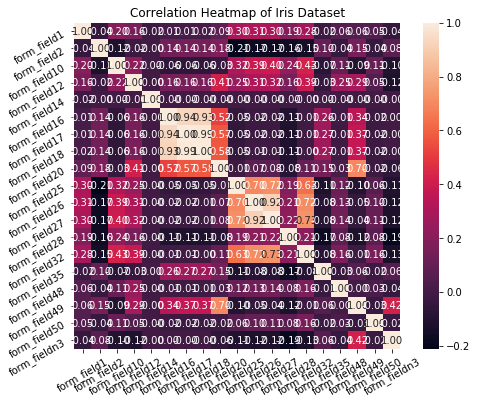

In [55]:
# Create correlation heatmap
plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap of Iris Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show() 

In [56]:
 # Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#upper  

In [57]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
print(to_drop)

['form_field17', 'form_field18', 'form_field26', 'form_field27', 'form_field32']


In [58]:
missing_col = new_data.columns[new_data.isna().any()]

In [59]:
missing_col = missing_col[:-1]
missing_col

Index([], dtype='object')

In [60]:
for col in missing_col:
    #new_data[col].fillna(method = 'ffill', inplace = True)
    new_data[col].fillna(0, inplace = True)

In [61]:
new_data.drop(['form_field10'], axis =1, inplace = True)
new_data.drop(['form_field17','form_field18','form_field20','form_field26','form_field27','form_fieldn3'], axis =1, inplace = True)
new_data.drop(['form_field32','form_field49'], axis =1, inplace = True)

In [62]:
new_data.head(10)

,form_field1,form_field2,form_field12,form_field14,form_field16,form_field25,form_field28,form_field35,form_field47,form_field48,form_field50,default_status
0,3436.0,0.28505,2301324.0,96375139,1.0,4000.5,60.0,0.0,charge,0.000000,0.044335,no
1,3456.0,0.67400,3982971.0,28141427,1.0,4161.0,304.0,0.0,charge,349.805730,0.322436,no
2,3276.0,0.53845,0.0,16576457,0.0,1597.5,60.0,0.0,charge,0.000000,0.011640,yes
3,3372.0,0.17005,771776.0,48187375,0.0,1701.0,60.0,1.0,charge,89.940100,0.082729,no
4,3370.0,0.77270,818456.0,28141427,0.0,1551.0,60.0,0.0,charge,97.887502,0.045630,no
5,3724.0,0.00000,976390.0,16576457,0.0,2590.5,3772.0,0.0,lending,0.000000,0.000000,no
6,3350.0,0.24205,0.0,21973443,0.0,822.0,426.0,0.0,charge,0.000000,0.004390,yes
7,3416.0,0.87020,1284089.0,11564970,0.0,1498.5,548.0,1.0,charge,155.295994,0.128389,no
8,3376.0,0.29180,97639.0,11564970,0.0,1597.5,182.0,0.0,charge,0.000000,0.009990,no
9,3310.0,0.24395,0.0,11564970,0.0,502.5,182.0,1.0,charge,0.000000,0.000000,yes


In [63]:
new_data.default_status[new_data.default_status == 'no'] = 0
new_data.default_status[new_data.default_status == 'yes'] = 1

In [64]:
new_data['default_status'] = new_data['default_status'].astype(int)

In [65]:
new_data.groupby(['form_field35'])['default_status'].count() 
Mean_encoded_subject =new_data.groupby(['form_field35'])['default_status'].mean().to_dict() 
new_data['form_field35'] = new_data['form_field35'].map(Mean_encoded_subject) 

In [66]:
new_data.groupby(['form_field47'])['default_status'].count() 
Mean_encoded_subject =new_data.groupby(['form_field47'])['default_status'].mean().to_dict() 
new_data['form_field47'] = new_data['form_field47'].map(Mean_encoded_subject) 

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
train = new_data[0:56000]
test = new_data[56000:]

In [69]:
train.default_status[train.default_status == 'no'] = 0
train.default_status[train.default_status == 'yes'] = 1

In [70]:
train['default_status'] = train['default_status'].astype(int)

In [71]:
X = train.drop(['default_status'], axis =1)
y = train['default_status']

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=19)

In [73]:
#from sklearn.preprocessing import StandardScaler,MinMaxScaler
#from sklearn.preprocessing import RobustScaler



#sc = MinMaxScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)

In [74]:
#import sklearn
#sklearn.metrics.SCORERS.keys()

In [75]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, classification_report, log_loss

In [76]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
cat__model = CatBoostClassifier(silent=True, n_estimators= 2000,learning_rate= 0.009)
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state = 20000)
n_scores = cross_val_score(cat__model,X_train,y_train, scoring = "neg_log_loss", cv=cv, n_jobs =1, error_score = "raise")
print("Accuracy: {:.4f}".format(np.mean(n_scores)))


Accuracy: -0.4214


In [79]:
from catboost import Pool
cat__model.fit(Pool(X_train,y_train))
cat = cat__model.predict_proba(X_test)[:,1]


In [80]:
#print(accuracy_score(y_test,cat))
#print(classification_report(y_test,cat))
print(log_loss(y_test,cat))

0.41983711551712516


In [81]:
#plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

#feat_importances = pd.Series(cat_model.feature_importances_, index= X.columns)

#feat_importances.nlargest(24).plot(kind='barh')

In [82]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score


features = X_train.columns

def metric(y,pred):
    return roc_auc_score(y,pred, labels = [0,1])

n_skf = 8
kf = StratifiedKFold(n_skf)
seed = 2020

params = {'n_estimators':2000,
          'learning_rate':0.009,
          #'objective':'CrossEntropy',
          'eval_metric':'AUC',
          'random_seed':seed,
          'early_stopping_rounds':200,
          'use_best_model': True

         }

          

In [83]:
##CATBOOST CROSSVAL

score_list = []
score = 0
test_oofs = []
          
          
          
for i, (tr_idx, vr_idx) in enumerate(kf.split(X,y)):
          xtrain, ytrain = X.loc[tr_idx, features], y.loc[tr_idx]
          xval,yval = X.loc[vr_idx, features], y.loc[vr_idx]
          model = CatBoostClassifier(**params)
          model.fit(xtrain, ytrain, eval_set = [(xval,yval)], verbose = 100)
          
          p = model.predict_proba(xval)[:,1]
          sc = metric(yval,p)
          score_list.append(sc)
          score += sc/n_skf
          
          pred  = model.predict_proba(test)[:,1]
          test_oofs.append(pred)
          
          
          print('Fold {} : {}'.format(i,sc))
          
          
print('Avg log: ', score)

0:	test: 0.7901657	best: 0.7901657 (0)	total: 49.8ms	remaining: 1m 39s
100:	test: 0.8122528	best: 0.8122664 (99)	total: 2.97s	remaining: 55.8s
200:	test: 0.8159336	best: 0.8159336 (200)	total: 5.67s	remaining: 50.7s
300:	test: 0.8179648	best: 0.8179648 (300)	total: 8.31s	remaining: 46.9s
400:	test: 0.8194000	best: 0.8194000 (400)	total: 11s	remaining: 44.1s
500:	test: 0.8203713	best: 0.8203805 (499)	total: 13.6s	remaining: 40.8s
600:	test: 0.8211225	best: 0.8211225 (600)	total: 16.3s	remaining: 38s
700:	test: 0.8216382	best: 0.8216382 (700)	total: 19.1s	remaining: 35.5s
800:	test: 0.8220745	best: 0.8220745 (800)	total: 22.4s	remaining: 33.5s
900:	test: 0.8224203	best: 0.8224203 (900)	total: 25.7s	remaining: 31.3s
1000:	test: 0.8227889	best: 0.8227889 (1000)	total: 28.7s	remaining: 28.6s
1100:	test: 0.8231224	best: 0.8231224 (1100)	total: 31.2s	remaining: 25.5s
1200:	test: 0.8234273	best: 0.8234321 (1199)	total: 33.6s	remaining: 22.3s
1300:	test: 0.8237959	best: 0.8237959 (1300)	total: 

200:	test: 0.8045772	best: 0.8045772 (200)	total: 5.94s	remaining: 53.2s
300:	test: 0.8068030	best: 0.8068030 (300)	total: 9.09s	remaining: 51.3s
400:	test: 0.8085665	best: 0.8085665 (400)	total: 11.9s	remaining: 47.5s
500:	test: 0.8095871	best: 0.8095913 (499)	total: 15s	remaining: 44.9s
600:	test: 0.8103660	best: 0.8103660 (600)	total: 18.2s	remaining: 42.3s
700:	test: 0.8109914	best: 0.8109914 (700)	total: 20.6s	remaining: 38.2s
800:	test: 0.8114471	best: 0.8114471 (800)	total: 23.1s	remaining: 34.6s
900:	test: 0.8118211	best: 0.8118211 (898)	total: 26s	remaining: 31.7s
1000:	test: 0.8120732	best: 0.8120732 (1000)	total: 28.6s	remaining: 28.5s
1100:	test: 0.8123964	best: 0.8123964 (1100)	total: 31s	remaining: 25.3s
1200:	test: 0.8125404	best: 0.8125404 (1200)	total: 33.4s	remaining: 22.2s
1300:	test: 0.8127364	best: 0.8127388 (1272)	total: 35.8s	remaining: 19.2s
1400:	test: 0.8128384	best: 0.8128384 (1400)	total: 38.2s	remaining: 16.3s
1500:	test: 0.8128700	best: 0.8129020 (1425)	to

In [84]:
f"{n_skf} fold CV, score: {score}"

'8 fold CV, score: 0.8259960222566065'

In [85]:
#oof_prediction = pd.DataFrame(test_oofs).T
#oof_prediction.columns = ['fold_' + str(i) for i in range(1, n_skf + 1)]
#oof_prediction.head()

In [86]:
#df = pd.read_csv('SampleSubmission.csv')
#df['default_status'] = np.mean(test_oofs, axis = 0)
#df.to_csv('CATCrossVale.csv', index = False)

In [87]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
light_model = LGBMClassifier(silent = True, metric = "binary_logloss", num_iterations = 210, learning_rate = 0.025, num_leaves = 65, max_depth = 8)
cv = RepeatedStratifiedKFold(n_splits = 7, n_repeats = 3, random_state = 20000)
n_scores = cross_val_score(light_model,X_train,y_train, scoring = "neg_log_loss", cv=cv, n_jobs =2, error_score = "raise")
print("Accuracy: {:.4f}".format(np.mean(n_scores)))

Accuracy: -0.4249


In [88]:
from lightgbm import LGBMClassifier
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label = y_train)
light_model.fit(X_train,y_train)
light = light_model.predict_proba(X_test)[:,1]
print(log_loss(y_test,light))
#print(classification_report(y_test,light))

0.42233321952318864


In [89]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
h_model = HistGradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
n_scores = cross_val_score(h_model,X_train,y_train, scoring = "accuracy", cv=cv, n_jobs =1, error_score = "raise")
print("Accuracy: {:.4f}".format(np.mean(n_scores)))


Accuracy: 0.7998


In [90]:
h_model = HistGradientBoostingClassifier()
h_model.fit(X_train,y_train)



HistGradientBoostingClassifier(l2_regularization=0.0, learning_rate=0.1,
                               loss='auto', max_bins=255, max_depth=None,
                               max_iter=100, max_leaf_nodes=31,
                               min_samples_leaf=20, n_iter_no_change=None,
                               random_state=None, scoring=None, tol=1e-07,
                               validation_fraction=0.1, verbose=0,
                               warm_start=False)

In [91]:
hist = h_model.predict_proba(X_test)[:,1]
print(log_loss(y_test,hist))

0.42311195673022345


In [92]:
test.drop(['default_status'], axis = 1, inplace = True)

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
ll = GradientBoostingClassifier(random_state = 10)
from sklearn.model_selection import GridSearchCV

parameter = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators': [100,250,500,750,1000,1250,1500,1750]}
tune = GridSearchCV(estimator = GradientBoostingClassifier(max_depth = 7, min_samples_split = 2, min_samples_leaf = 2, subsample = 1, max_features = 'sqrt', random_state = 10), param_grid = parameter, scoring = 'neg_log_loss', n_jobs = 2, iid=False, cv=3)

In [94]:
#tune.fit(X_train,y_train)
#print(tune.best_params_)
#print(tune.best_score_)

In [95]:
gb_model = GradientBoostingClassifier(learning_rate = 0.005, n_estimators = 1250, max_depth = 5, min_samples_split = 2, min_samples_leaf = 1, subsample = 1, max_features = 'sqrt', random_state = 10)

In [96]:
gb_model.fit(X_train,y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.005, loss='deviance', max_depth=5,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [97]:
pred = gb_model.predict_proba(X_test)[:,1]
print(log_loss(y_test,pred))
#accuracy_score(y_test, pred)

0.4220608334443221


In [98]:
## CAtboostCroosval



In [99]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k= 5).fit_transform(X_train,y_train)

In [103]:
X_new


array([[2.19590500e+06, 9.63751390e+07, 6.07720000e+04, 0.00000000e+00,
        2.43995008e-02],
       [1.05496800e+06, 7.70998000e+07, 6.07720000e+04, 1.37886289e+04,
        6.13501506e-01],
       [4.91073600e+06, 3.46949100e+07, 6.07720000e+04, 3.09550242e+03,
        7.14463493e-01],
       ...,
       [2.38651500e+06, 1.73474550e+07, 6.07720000e+04, 2.38651500e+06,
        0.00000000e+00],
       [0.00000000e+00, 1.16700000e+03, 0.00000000e+00, 0.00000000e+00,
        1.08906760e+03],
       [0.00000000e+00, 1.16700000e+03, 6.00000000e+01, 0.00000000e+00,
        3.30050559e+02]])

,form_field1,form_field2,form_field12,form_field14,form_field16,form_field25,form_field28,form_field35,form_field47,form_field48,form_field50
24986,3776.0,0.30910,2195905.0,96375139,0.0,2121.0,60772.0,0.154159,0.222357,0.000000e+00,0.024400
16196,3748.0,0.04290,1054968.0,77099800,0.0,2284.5,60772.0,0.154159,0.222357,1.378863e+04,0.613502
48255,3646.0,0.30220,4910736.0,34694910,0.0,2301.0,60772.0,0.154159,0.077699,3.095502e+03,0.714463
43905,3624.0,0.00000,0.0,16576457,0.0,0.0,60772.0,0.154159,0.222357,0.000000e+00,0.000000
7518,0.0,0.20710,100751.0,9637475,0.0,228.0,0.0,0.154159,0.222357,7.719792e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
33811,3378.0,1.00920,371884.0,28912425,0.0,2145.0,60.0,0.154159,0.222357,2.568969e+01,0.013333
21416,3786.0,0.00000,379275.0,77099800,0.0,1581.0,60772.0,0.154159,0.077699,0.000000e+00,0.047750
34146,3766.0,0.00000,2386515.0,17347455,0.0,3064.5,60772.0,0.154159,0.077699,2.386515e+06,0.000000
17141,3326.0,0.96130,0.0,1167,0.0,1392.0,0.0,0.154159,0.222357,0.000000e+00,1089.067604


In [ ]:
from sklearn.metrics import log_loss
print('CatBoost Log loss: {}'.format(log_loss(y_test, cat_model.predict_proba(X_test)[:,1])))
#print('LGBM Log loss: {}'.format(log_loss(y_test, light_model.predict_proba(X_test)[:,1])))
#print('Hist Log loss: {}'.format(log_loss(y_test, h_model.predict_proba(X_test)[:,1])))
#print('GradientBoostingClassifier Log loss: {}'.format(log_loss(y_test, gb_model.predict_proba(X_test)[:,1])))
print('CatBoostOutofFold Log loss Log loss: {}'.format(log_loss(y_test, model.predict_proba(X_test)[:,1])))

In [ ]:
test.drop(['default_status'],axis=1, inplace = True)

In [ ]:
r_pred = cat_model.predict_proba(X_test)[:,1]
l_pred = light_model.predict_proba(X_test)[:,1]
h_pred = h_model.predict_proba(X_test)[:,1]
gb_pred = gb_model.predict_proba(X_test)[:,1]
pred = model.predict_proba(X_test)[:,1]

In [ ]:
real_pred1 = cat_model.predict_proba(test)[:,1]
real_pred2 = light_model.predict_proba(test)[:,1]
real_pred3 = h_model.predict_proba(test)[:,1]
real_pred4 = gb_model.predict_proba(test)[:,1]
real_pred5 = model.predict_proba(test)[:,1]

In [ ]:
stacked_predictions = np.column_stack((r_pred,l_pred,h_pred,gb_pred,pred))
stacked_testpred = np.column_stack((real_pred1,real_pred2,real_pred3,real_pred4,real_pred5))

In [ ]:
cat_model.fit(stacked_predictions,y_test)

In [ ]:
finalpred2 = cat_model.predict_proba(stacked_testpred)[:,1]

In [ ]:
#test_prediction = cat_model.predict_proba(test)[:,-1]
test_prediction = light_model.predict_proba(test)[:,-1]

In [ ]:
df = pd.read_csv('Test.csv')
output = pd.DataFrame({'Applicant_ID' : df['Applicant_ID'], "default_status": finalpred2})
output.head(20)

In [ ]:
output.to_csv('Stack2Cat.csv', index = False)